## **About dataset**
****
https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho <br>
This dataset contains information about used cars. <br>
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.

### **About features**
****
* Car_Name : name of the cars
* Year : year of the car when it was bought
* Selling_Price : price at which the car is being sold
* KMS_Driven : number of kilometres the car is driven
* Fuel_Type : fuel type of car (petrol/diesel/CNG/LPG/electric)
* Seller_Type : tells if a seller is individual or a dealer
* Transmission : gear transmission of the car (automatic/manual)
* Owner : number of previous owners of the car

In [5]:
!python -m wget https://drive.google.com/uc?id=1VJq6qDgMQx-sM4LuBjimM4K4tQoXiplv -o car_data.csv


Saved under car_data.csv


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [6]:
df = pd.read_csv('./car_data.csv')

In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### **Проведите первичный анализ данных**
****

In [8]:
df.shape

(301, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
double = df.duplicated().sum()
double

2

In [13]:
df = df.drop_duplicates()

print(f'No. of duplicate records: {double}')
print(f'Shape after dropping duplicate records: {df.shape}')

No. of duplicate records: 2
Shape after dropping duplicate records: (299, 9)


In [14]:
df.rename(columns=lambda c: c.lower(), inplace=True)

In [15]:
df.head()

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
df.describe()

,year,selling_price,present_price,kms_driven,owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [17]:
df.selling_price.min(), df.selling_price.max()

(0.1, 35.0)

In [18]:
df.present_price.min(), df.present_price.max()

(0.32, 92.6)

In [19]:
df.kms_driven.min(), df.kms_driven.max()

(500, 500000)

In [20]:
df.describe(include=['object'])

,car_name,fuel_type,seller_type,transmission
count,299,299,299,299
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,193,260


In [21]:
for cat_colname in df.select_dtypes(include='object').columns:
  print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

car_name

city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: car_name, Length: 98, dtype: int64
****************************************************************************************************

fuel_type

Petrol    239
Diesel     58
CNG         2
Name: fuel_type, dtype: int64
****************************************************************************************************

seller_type

Dealer        193
Individual    106
Name: seller_type, dtype: int64
****************************************************************************************************

transmission

Manual       260
Automatic     39
Name: transmission, dtype: int64
*********************************************************

In [22]:
for colname in df.loc[:,['year', 'owner']]:
  print(str(colname) + '\n\n' + str(df[colname].value_counts()) + '\n' + '*' * 100 + '\n')

year

2015    60
2016    49
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: year, dtype: int64
****************************************************************************************************

owner

0    288
1     10
3      1
Name: owner, dtype: int64
****************************************************************************************************



#### Feature **selling_price**

In [23]:
df.selling_price.nunique()

156

In [24]:
len(df.loc[df.selling_price < 25])

297

In [25]:
df.loc[df.selling_price >= 25]

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0
86,land cruiser,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0


#### Feature **present_price**

In [26]:
df.present_price.nunique()

147

In [27]:
len(df.loc[df.present_price < 40])

298

In [28]:
df.loc[df.present_price >= 40]

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0


#### Feature **kms_driven**

In [29]:
df.kms_driven.nunique()

206

In [30]:
df.loc[df.kms_driven > 100000]

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
77,corolla,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
85,camry,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


### **Проведите визуальный анализ данных**
****

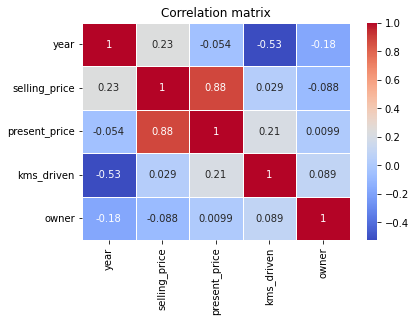

In [31]:
plt.figure(figsize=(6,4))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

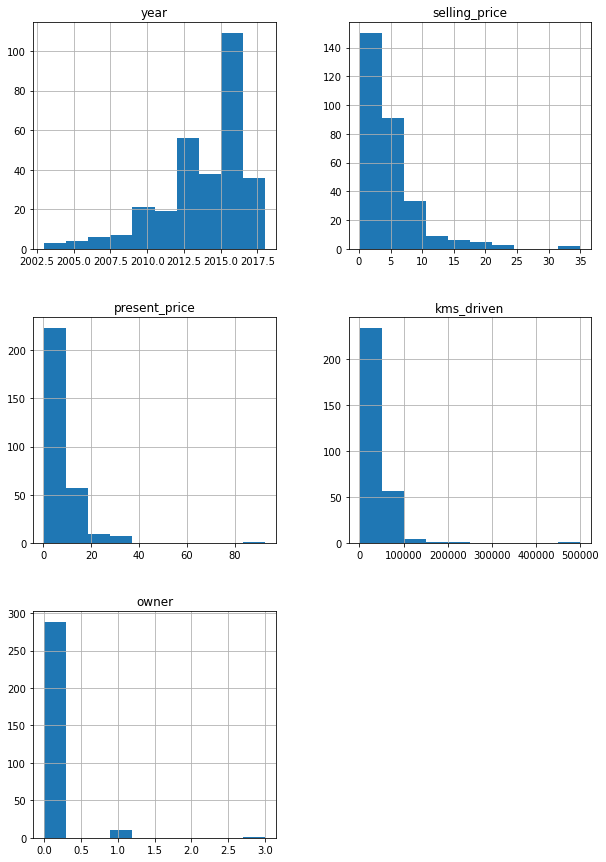

In [32]:
df.hist(figsize=(10, 15), grid=True);

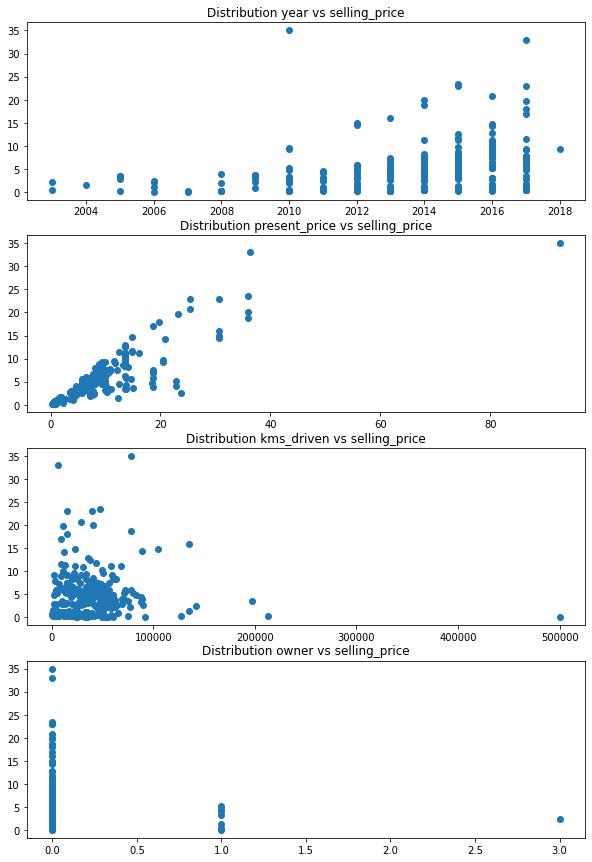

In [33]:
df_need_columns = ['year', 'present_price', 'kms_driven', 'owner']
fig, ax = plt.subplots(4, 1, figsize=(10, 15))
for i, col in enumerate(df_need_columns):
  ax[i].scatter(df[col], df.selling_price)
  ax[i].set_title(f'Distribution {col} vs selling_price')

**На графиках выше видно у признака present_price есть выброс и у признака kms_driven также есть выброс. Ну либо маловато данных подобного масштаба, ниже я удаляю эти выбросы из выборки**

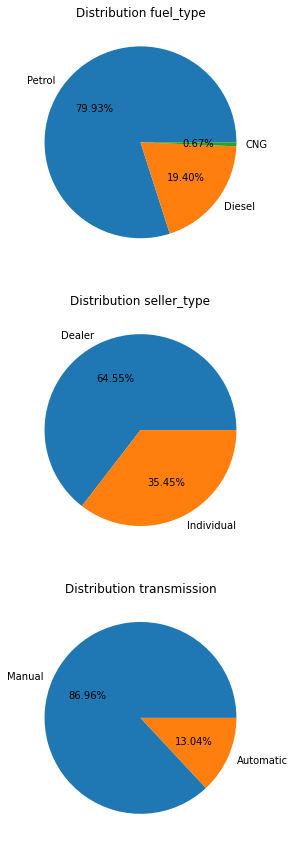

In [34]:
df_need_col = ['fuel_type', 'seller_type', 'transmission']
fig, ax = plt.subplots(3, 1, figsize=(10,15))
for i, col in enumerate(df_need_col):
  ax[i].pie(df[col].value_counts().values, labels=df[col].value_counts().index, autopct='%.2f%%')
  ax[i].set_title(f'Distribution {col}')

**Удаляю выбросы, о которых гооврила выше**

In [35]:
df.drop(index=[86,196], inplace=True)

In [36]:
df.reset_index(drop=True, inplace=True)

### **Разбейте данные на обучение и тест**
****

In [37]:
X = df.drop(columns=['selling_price'])
y = df.selling_price

X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=100)

### **Удалите категориальные признаки**
****

In [38]:
# удаление категориальных признаков из датасета
class DataPipeline(BaseEstimator, TransformerMixin):

  def __init__(self):
    pass

  def fit(self, df, y=None):
    return self

  def transform(self, df, y=None):

    for col in df.select_dtypes(include='object').columns:
      df.drop(columns=col, inplace=True)

    return df

In [39]:
pipe = DataPipeline()
pipe.fit(X_train_orig)

X_train = pipe.transform(X_train_orig)
X_test = pipe.transform(X_test_orig)

In [40]:
X_train.head()

,year,present_price,kms_driven,owner
118,2011,1.50,6900,0
287,2015,6.10,31427,0
59,2013,18.61,40001,0
69,2014,6.76,71000,0
160,2010,0.95,27000,0


In [41]:
X_test.head()

,year,present_price,kms_driven,owner
220,2013,9.40,36198,0
139,2015,0.84,29000,0
223,2011,4.43,57000,0
175,2014,0.52,19000,0
229,2013,5.70,53000,0


### **Сделайте предобработку данных с помощью класса и пайплайна**
****

In [ ]:
pipe = make_pipeline(
    StandardScaler()
)
pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler())])

In [ ]:
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [ ]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""

    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )

    plt.figure(figsize=(4, 4))

    sns.scatterplot(x=pred_values, y=true_values)
    #plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values

    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')

    if save == True:
        plt.savefig('report.png')
    plt.show()

###**Обучите модель регрессии, с целевым признаком selling_price**
****

###**1. Первый вариант обучения**

R2:	0.894
RMSE:	1.62
MSE:	2.623


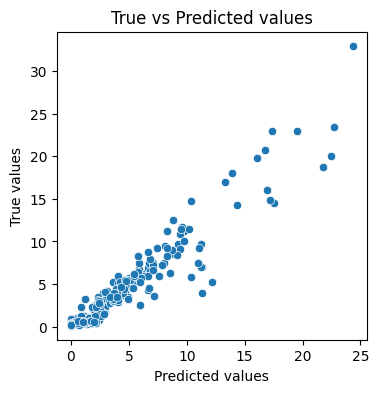

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_preds = lr_model.predict(X_train)

# Постпроцессинг
y_preds = np.clip(y_preds, a_min=0, a_max=50)

evaluate_preds(y_train, y_preds)

R2:	0.797
RMSE:	1.406
MSE:	1.978


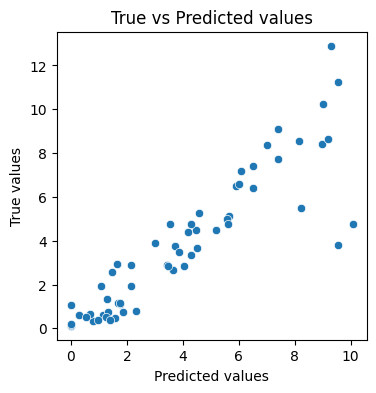

In [ ]:
y_test_preds = lr_model.predict(X_test)

# Постпроцессинг
y_test_preds = np.clip(y_test_preds, a_min=0, a_max=50)
evaluate_preds(y_test, y_test_preds)

**Вывод:** поделила выборку на train/test, удалила категориальные признаки, сделала стандартизацию с помощью pipeline, обучила линейную регрессию на полученных преобразованных данных. Получила метрики. С постпроцессигом метрики и на трейне, и на тесте получились выше

###**2. Второй вариант обучения**

In [ ]:
X1 = X

In [ ]:
X1.head()

,car_name,year,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0


**Удалаяю категориальные признаки и меняю признак year на более осмысленный признак age**

In [ ]:
X1 = X1.drop(columns=['car_name', 'fuel_type', 'seller_type', 'transmission'], axis=1)

In [ ]:
maximum = X1.year.max()

In [ ]:
age = X1.year.apply(lambda c: (maximum + 1) - c)
X1.drop('year', axis=1, inplace=True)
X1.insert(0, 'age', age)
X1.head()

,age,present_price,kms_driven,owner
0,5,5.59,27000,0
1,6,9.54,43000,0
2,2,9.85,6900,0
3,8,4.15,5200,0
4,5,6.87,42450,0


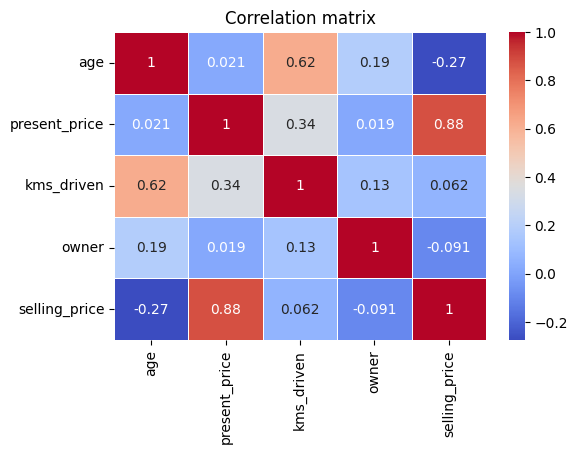

In [ ]:
plt.figure(figsize=(6,4))
corr_matrix = pd.concat([X1, y], axis=1).corr()
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

**Целевой признак selling_price сильно коррелирует с признаком present_price**

###**Сначала обучаемся в цикле...**

In [ ]:
degrees = [1, 2, 3, 4]

In [ ]:
for degree in degrees:
  pipe = make_pipeline(
      PolynomialFeatures(degree=degree),
      StandardScaler()
  )
  X_poly = pipe.fit_transform(X1)
  X_poly = pd.DataFrame(X_poly, columns=pipe.get_feature_names_out(X1.columns))

  lr_poly = LinearRegression()
  X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=100, test_size=0.2)
  lr_poly.fit(X_train, y_train)
  r2_train = lr_poly.score(X_train, y_train)
  r2_test = lr_poly.score(X_test, y_test)
  print('Polynomial degree {0}: r2_score_train={1}, r2_score_test={2}'.format(degree, r2_train, r2_test))



Polynomial degree 1: r2_score_train=0.8786605607411706, r2_score_test=0.7567474358500466
Polynomial degree 2: r2_score_train=0.96678964066556, r2_score_test=0.941398120512933
Polynomial degree 3: r2_score_train=0.9737644806312656, r2_score_test=0.947017617487445
Polynomial degree 4: r2_score_train=0.9782714251264445, r2_score_test=0.9402380053053201


**Делаю тоже самое, что и выше, просто с картинками и беру конкретно degree=3, include_bias=False для PolynomialFeatures**

In [ ]:
pipe = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    StandardScaler()
)

In [ ]:
X_poly = pipe.fit_transform(X1)


In [ ]:
X_poly = pd.DataFrame(X_poly, columns=pipe.get_feature_names_out(X1.columns))

In [ ]:
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=100, test_size=0.2)
lr.fit(X_train, y_train)

LinearRegression()

R2:	0.974
RMSE:	0.802
MSE:	0.644


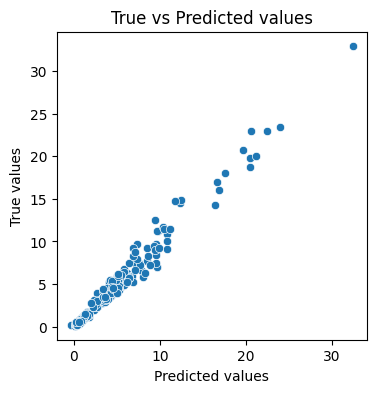

In [ ]:
y_train_preds = lr.predict(X_train)

evaluate_preds(y_train, y_train_preds)

R2:	0.948
RMSE:	0.712
MSE:	0.507


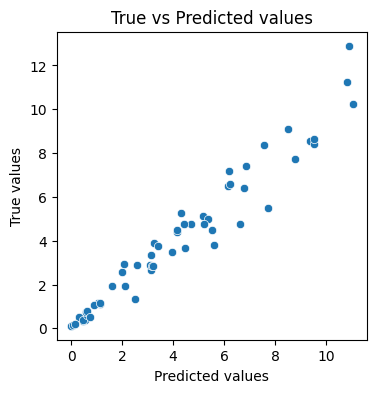

In [ ]:
y_test_preds = lr.predict(X_test)

evaluate_preds(y_test, y_test_preds)

**Вывод:** удалила категориальные признаки, заменила признак year на age. После этого циклом прошлась по степеням 1,2,3,4 в PolynomialFeature + стандартизация на всех данных. Получилось что выше всего метрика при степени 3. Pipeline сделала PolynomialFeature со степенью 3 + стандартизация на неразделенных данных. Потом поделила данные на train/test и обучила модель линейной регрессии. Стало сильно лучше на трейне 0.974 и на тесте 0.948

###**3. Третий вариант обучения**

In [ ]:
X1.head()

,age,present_price,kms_driven,owner
0,5,5.59,27000,0
1,6,9.54,43000,0
2,2,9.85,6900,0
3,8,4.15,5200,0
4,5,6.87,42450,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=100, test_size=0.2)

In [ ]:
for degree in degrees:
  pipe = make_pipeline(
      PolynomialFeatures(degree=degree, include_bias=False),
      StandardScaler()
  )
  X_poly_train = pipe.fit_transform(X_train)
  X_poly_train = pd.DataFrame(X_poly_train, columns=pipe.get_feature_names_out(X1.columns))

  X_poly_test = pipe.transform(X_test)
  X_poly_test = pd.DataFrame(X_poly_test, columns=pipe.get_feature_names_out(X1.columns))

  lr_poly = LinearRegression()
  lr_poly.fit(X_poly_train, y_train)

  r2_train = lr_poly.score(X_poly_train, y_train)
  r2_test = lr_poly.score(X_poly_test, y_test)

  print('Polynomial degree {0}: r2_score_train={1}, r2_score_test={2}'.format(degree, r2_train, r2_test))

Polynomial degree 1: r2_score_train=0.8786605607411706, r2_score_test=0.756747435850047
Polynomial degree 2: r2_score_train=0.96678964066556, r2_score_test=0.9413981205129329
Polynomial degree 3: r2_score_train=0.9738656591721129, r2_score_test=0.9481075947904626
Polynomial degree 4: r2_score_train=0.978452227883771, r2_score_test=0.9401521960985336


**Вывод:** в общем, тут я сначала поделила на train/test выборку, предварительно удалив категориальные признаки, а потом в цикле пайпланом сделала PolinomialFeature + StandardScaler, также обучила линейную модель, получила метрики. Никакой разницы скоров с предыдущим вариантом нет, также лучший r2 получился со степенью 3 PolynomialFeature

###**4. Четвертый вариант обучения**

In [ ]:
X2 = X

In [ ]:
X2.head()

,car_name,year,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0


**Я прочитала, что когда категориальный признак имеет много уникальных значений при небольшом размере выборки, то его можно удалить. По крайней мере, я так поняла эту фичу. Поэтому удаляю категориальный признак car_name, у которого 98 уникальных значений на размер выборки 300**

In [ ]:
X2.drop('car_name', axis=1, inplace=True)

In [ ]:
X2.head(2)

,year,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,2014,5.59,27000,Petrol,Dealer,Manual,0
1,2013,9.54,43000,Diesel,Dealer,Manual,0


**Также признак year меняю на более осмысленный age**

In [ ]:
maximum = X2.year.max()
age = X2.year.apply(lambda c: (maximum + 1) - c)
X2.drop('year', axis=1, inplace=True)
X2.insert(0, 'age', age)
X2.head(2)

,age,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,5,5.59,27000,Petrol,Dealer,Manual,0
1,6,9.54,43000,Diesel,Dealer,Manual,0


**У меня осталось еще три категориальных признака fuel_type, seller_type, transmission. В лекции по классификации я подсмотрела, что категориальные признаки можно перевести в числовой эквивалент. Посмотрим, что из этого выйдет.**

In [ ]:
X2_cat = pd.get_dummies(X2, columns=['fuel_type', 'seller_type', 'transmission'], drop_first=True)
X2_cat.head(2)

,age,present_price,kms_driven,owner,fuel_type_Diesel,fuel_type_Petrol,seller_type_Individual,transmission_Manual
0,5,5.59,27000,0,0,1,0,1
1,6,9.54,43000,0,1,0,0,1


**Сделаю преобразования и обучение в цикле**

In [ ]:
for degree in degrees:
  pipe = make_pipeline(
      PolynomialFeatures(degree=degree, include_bias=False),
      StandardScaler()
  )
  X_poly = pipe.fit_transform(X2_cat)
  X_poly = pd.DataFrame(X_poly, columns=pipe.get_feature_names_out(X2_cat.columns))

  lr_poly = LinearRegression()
  X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=100, test_size=0.2)
  lr_poly.fit(X_train, y_train)
  r2_train = lr_poly.score(X_train, y_train)
  r2_test = lr_poly.score(X_test, y_test)

  print('Polynomial degree {0}: r2_score_train={1}, r2_score_test={2}'.format(degree, r2_train, r2_test))

Polynomial degree 1: r2_score_train=0.8927505440039263, r2_score_test=0.8031508101239079
Polynomial degree 2: r2_score_train=0.9834204362630582, r2_score_test=0.9524418374842017
Polynomial degree 3: r2_score_train=0.99098409059012, r2_score_test=0.9692058070084759
Polynomial degree 4: r2_score_train=0.9948407505928213, r2_score_test=-1.1451060513700028e+19


**Делаю тоже самое, что и выше просто беру уже конкретно degree=3, include_bias=False для PolynomialFeatures**

In [ ]:
X2_cat.head(2)

,age,present_price,kms_driven,owner,fuel_type_Diesel,fuel_type_Petrol,seller_type_Individual,transmission_Manual
0,5,5.59,27000,0,0,1,0,1
1,6,9.54,43000,0,1,0,0,1


In [ ]:
pipe = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    StandardScaler()
)

In [ ]:
X_poly = pipe.fit_transform(X2_cat)
X_poly = pd.DataFrame(X_poly, columns=pipe.get_feature_names_out(X2_cat.columns))

In [ ]:
X_poly.head(2)

,age,present_price,kms_driven,owner,fuel_type_Diesel,fuel_type_Petrol,seller_type_Individual,transmission_Manual,age^2,age present_price,...,fuel_type_Petrol^3,fuel_type_Petrol^2 seller_type_Individual,fuel_type_Petrol^2 transmission_Manual,fuel_type_Petrol seller_type_Individual^2,fuel_type_Petrol seller_type_Individual transmission_Manual,fuel_type_Petrol transmission_Manual^2,seller_type_Individual^3,seller_type_Individual^2 transmission_Manual,seller_type_Individual transmission_Manual^2,transmission_Manual^3
0,-0.122944,-0.241035,-0.291194,-0.175708,-0.487340,0.497895,-0.73951,0.383038,-0.278432,-0.238918,...,0.497895,-0.734071,0.638422,-0.734071,-0.685782,0.638422,-0.73951,-0.685782,-0.685782,0.383038
1,0.224812,0.322903,0.275661,-0.175708,2.051957,-2.008457,-0.73951,0.383038,-0.021690,0.372915,...,-2.008457,-0.734071,-1.566362,-0.734071,-0.685782,-1.566362,-0.73951,-0.685782,-0.685782,0.383038


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=100, test_size=0.2)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

R2:	0.991
RMSE:	0.471
MSE:	0.222


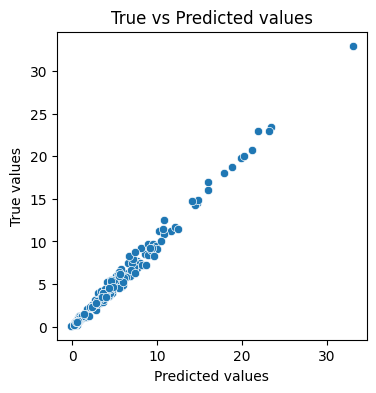

In [ ]:
y_train_preds = lr.predict(X_train)

evaluate_preds(y_train, y_train_preds)

R2:	0.969
RMSE:	0.548
MSE:	0.301


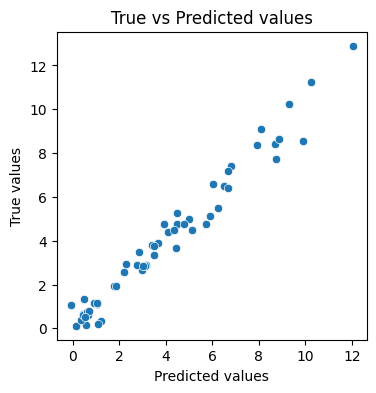

In [ ]:
y_test_preds = lr.predict(X_test)

evaluate_preds(y_test, y_test_preds)

**Вывод:** получилась красота! Скор на тесте почти 0.97. Для этого удалила дубликаты и выбросы из выборки. Удалила признак car_name, так как он имел слишком много уникальных значений, и больше мешал бы чем помогал модели. Потом преобразовала признак year в более осмысленный age. Оставшиеся категориальные признаки перевела в числовой эквивалент, который понятен линейной модели. train/test делила как 80/20. Потом применила PolynomialFeature с degree=3 и include_bias=False. Я так понимаю, 0.969 на тесте это в принципе еще не предел. Т.к. насколько я понимаю признаки после всех манипуляций (с перемножением друг на друга) могут начать сильно коррелировать друг с другом и это будет мешать линейной модели обучаться лучше.